<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/W-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import time 
import imageio
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
import cv2
import keras
from sklearn.model_selection import train_test_split

# Reading **Images**

In [2]:
folder_dir = '/content/data1' 
a = [1,2,3,4,5]

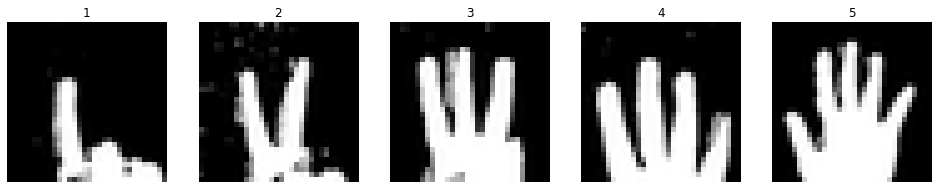

In [3]:
plt.figure(figsize=(20,20))
for i in a:
    plt.subplot(1, 6, i + 1)
    img = cv2.imread(folder_dir + '/' + str(i) + '/0.png',cv2.IMREAD_GRAYSCALE)
    plt.imshow(img,cmap='gray')
    plt.title(i)
    plt.axis('off')

In [4]:
images = []
for i in range(5):
  for j in range(201):
    img = cv2.imread(folder_dir + '/' + str(i+1) + '/' + str(j) + '.png',cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
images = np.array(images).astype('float32')
images = images / 255
images = (images*2) - 1
images.shape

(1005, 32, 32)

# **Discriminator**

In [5]:
def discriminator():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(),
                        input_shape=[32, 32, 1]))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU()))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1, activation="sigmoid"))
  return model
discriminator = discriminator()

# **Generator**

In [6]:
def generator():
  model = Sequential()
  model.add(Dense(8 * 8 * 128, input_shape=[100]))
  model.add(Reshape([8, 8, 128]))
  model.add(keras.layers.BatchNormalization())
  model.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
  model.add(keras.layers.BatchNormalization())
  model.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))
  return model
generator = generator()

# **Wasserstein Loss**

In [7]:
def calculating_penalty(real,fake):
  epsilon = tf.random.normal([batch_size,1,1,1],0,1)
  interpolated_images = real*epsilon + fake*(1-epsilon)
  with tf.GradientTape() as tape:
    tape.watch(interpolated_images)
    interpolated_score = discriminator(interpolated_images)
  gradient = tape.gradient(interpolated_score,interpolated_images)
  norm = tf.norm(gradient)
  penalty = tf.math.reduce_mean((norm-1)**2)
  return penalty

# **Training**

Epoch =  25


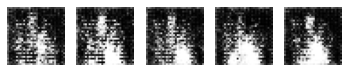

Epoch =  50


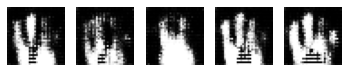

Epoch =  75


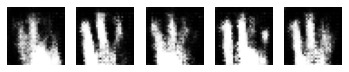

Epoch =  100


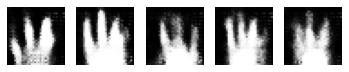

Epoch =  125


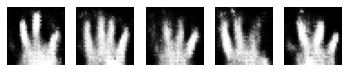

Epoch =  150


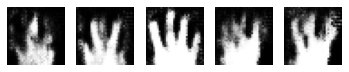

Epoch =  175


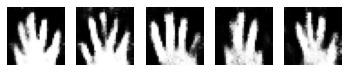

Epoch =  200


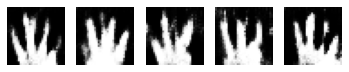

Epoch =  225


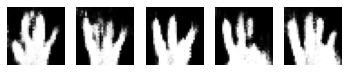

Epoch =  250


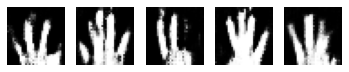

Epoch =  275


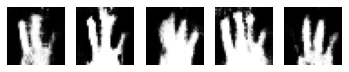

Epoch =  300


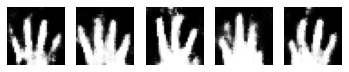

Epoch =  325


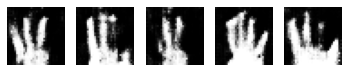

Epoch =  350


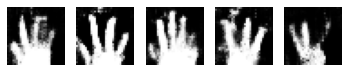

Epoch =  375


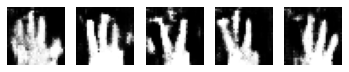

Epoch =  400


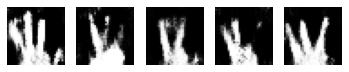

Epoch =  425


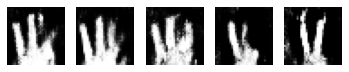

Epoch =  450


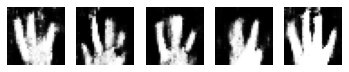

Epoch =  475


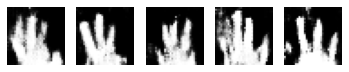

Epoch =  500


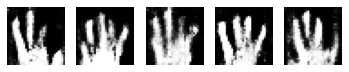

Epoch =  525


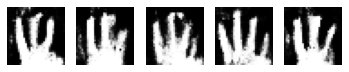

Epoch =  550


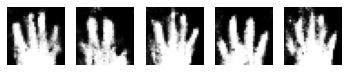

Epoch =  575


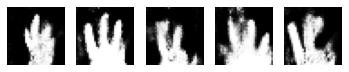

Epoch =  600


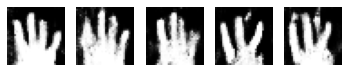

Epoch =  625


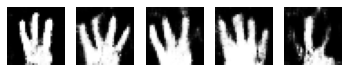

Epoch =  650


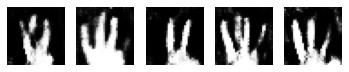

Epoch =  675


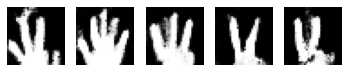

Epoch =  700


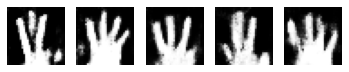

Epoch =  725


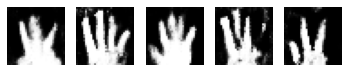

Epoch =  750


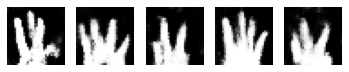

In [8]:
from keras.engine import training
from numpy.lib.function_base import gradient
epochs = 750
batch_size = 100
noise_shape=100
loss_disc = []
loss_gen = []
accu_real_disc = []
accu_fake_disc = []

for epoch in range(epochs):
  for i in range(images.shape[0]//batch_size):
    noise = np.random.normal(size=[batch_size,noise_shape])
    with tf.GradientTape() as discriminator_tape:
      fake_image = generator(noise,training=True)
      real_image = images[i*batch_size:(i+1)*batch_size].reshape(-1,32,32,1)
      real_disc_out = discriminator(real_image,training=True)
      fake_disc_out = discriminator(fake_image,training=True)
      penalty = calculating_penalty(real_image,fake_image)
      disc_loss = tf.math.reduce_mean(fake_disc_out) - tf.math.reduce_mean(real_disc_out) + 10*penalty
    gradient_for_disc = discriminator_tape.gradient(disc_loss,discriminator.trainable_variables)
    keras.optimizers.Adam(1e-4).apply_gradients(zip(gradient_for_disc,discriminator.trainable_variables))
    with tf.GradientTape() as generator_tape:
      fake_image = generator(noise,training=True)
      fake_disc_out = discriminator(fake_image,training=True)
      gen_loss = (-1)*tf.math.reduce_mean(fake_disc_out)
    gradient_for_gen = generator_tape.gradient(gen_loss,generator.trainable_variables)
    keras.optimizers.Adam(1e-4).apply_gradients(zip(gradient_for_gen,generator.trainable_variables))
  loss_disc.append(disc_loss)
  loss_gen.append(gen_loss)
  if (epoch+1)%25 == 0:
    print('Epoch = ',str(epoch+1))
    fake_image = generator(np.random.normal(size=(5,100)),training=False)
    for k in range(5):
      plt.subplot(1,5,k+1)
      plt.imshow(fake_image[k].numpy().reshape(32,32),cmap='gray')
      plt.axis('off')
    plt.show()

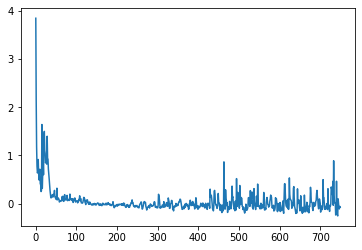

In [9]:
plt.plot(loss_disc)

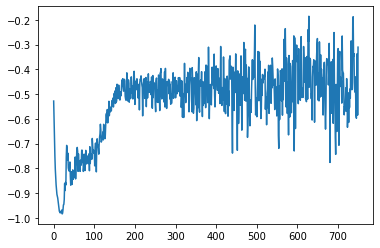

In [10]:
plt.plot(loss_gen)